## Amazon Employee Access
When employees start working in an organization, they first need to obtain the computer access necessary to fulfill their role. This access may allow employees to read/manipulate resources through various applications or web portals.
It is assumed that employees fulfilling the functions of a given role will access the same or similar resources. Often, employees figure out the access they need as they encounter roadblocks during their daily work (such as, not being able to log into a reporting portal). A knowledgeable supervisor then takes time to manually grant the access needed to overcome these obstacles. As employees change roles within a company, this access discovery/recovery cycle wastes a huge amount of time and money.
There is a considerable amount of data regarding employees’ roles within an organization and the resources to which they have access. Given the data related to current employees and their provisioned access, models can be built that automatically determine access privileges as employees enter and leave roles within a company. These auto-access models seek to minimize human involvement required to grant or revoke employee access.

In [1]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset
df_train=pd.read_csv('train.csv')
df_train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [3]:
df_train.shape

(32769, 10)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


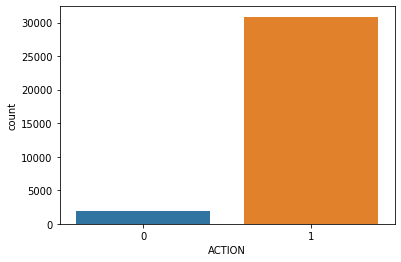

In [5]:
#count values of target variables
sns.countplot(df_train['ACTION'])
plt.show()

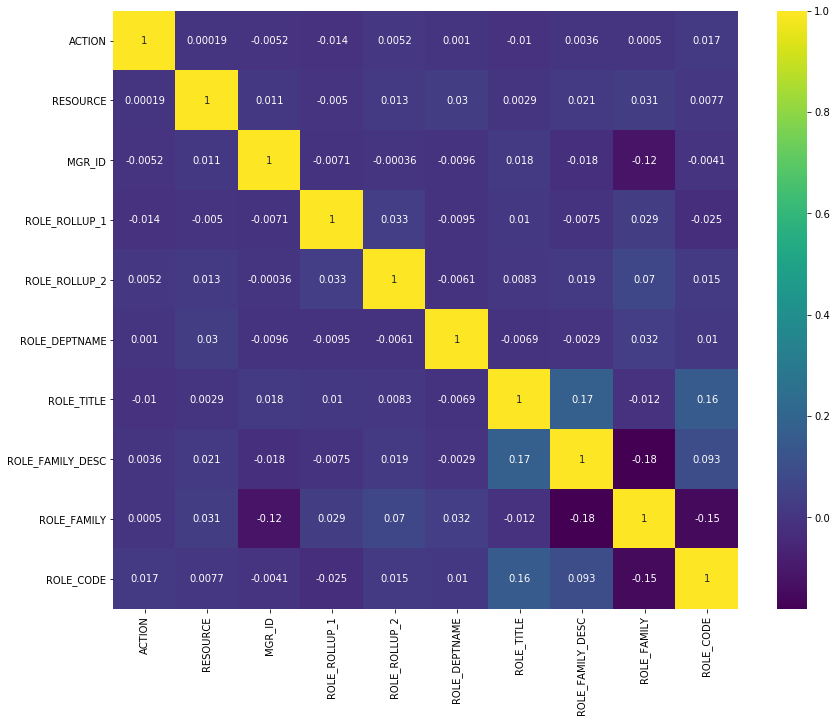

In [6]:
#plotting the heatmap
plt.figure(figsize=(14,11))
sns.heatmap(df_train.corr(),annot=True,cmap='viridis')
plt.show()

In [7]:
#Creating feature and target variables
x=df_train.iloc[:,1:11].values
y=df_train.iloc[:,0].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)

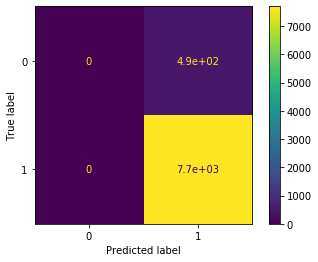

In [11]:
plot_confusion_matrix(lr,x_test,y_test)

In [12]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       492
           1       0.94      1.00      0.97      7701

    accuracy                           0.94      8193
   macro avg       0.47      0.50      0.48      8193
weighted avg       0.88      0.94      0.91      8193



C:\Users\PSingh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)

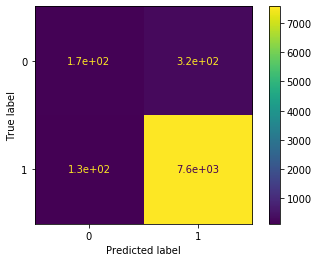

In [14]:
plot_confusion_matrix(rf,x_test,y_test)

In [15]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.57      0.35      0.43       492
           1       0.96      0.98      0.97      7701

    accuracy                           0.95      8193
   macro avg       0.77      0.67      0.70      8193
weighted avg       0.94      0.95      0.94      8193



### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dec_tr = DecisionTreeClassifier(max_depth=4)
dec_tr.fit(x_train,y_train)
pred3=dec_tr.predict(x_test)

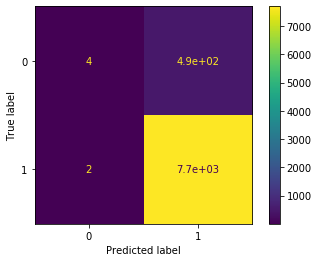

In [17]:
plot_confusion_matrix(dec_tr,x_test,y_test)

In [18]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.67      0.01      0.02       492
           1       0.94      1.00      0.97      7701

    accuracy                           0.94      8193
   macro avg       0.80      0.50      0.49      8193
weighted avg       0.92      0.94      0.91      8193



In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred4=knn.predict(x_test)

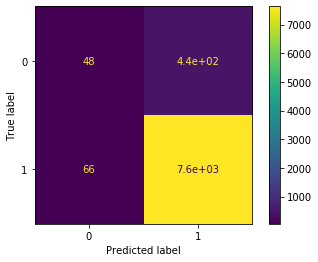

In [20]:
plot_confusion_matrix(knn,x_test,y_test)

In [21]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.42      0.10      0.16       492
           1       0.95      0.99      0.97      7701

    accuracy                           0.94      8193
   macro avg       0.68      0.54      0.56      8193
weighted avg       0.91      0.94      0.92      8193



### Making Predictions
Since Random Forest Classifier provided the best accuracy with better data balance, it will be used to make predictions for test dataset

In [22]:
df_test=pd.read_csv('test.csv')
df_test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,32642,7792,118573,118574,117945,136261,128463,292795,119082
1,2,4696,14638,117961,118343,118514,118321,289122,255851,118322
2,3,22662,1760,118887,118888,120171,118396,255118,118398,118399
3,4,75078,7576,117961,118052,120671,118321,117906,257051,118322
4,5,39879,55668,117902,118041,117945,135951,134458,19776,119082


In [23]:
df_test['Action']=rf.predict(df_test.drop('id',axis=1).values)
df_test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,Action
0,1,32642,7792,118573,118574,117945,136261,128463,292795,119082,1
1,2,4696,14638,117961,118343,118514,118321,289122,255851,118322,1
2,3,22662,1760,118887,118888,120171,118396,255118,118398,118399,1
3,4,75078,7576,117961,118052,120671,118321,117906,257051,118322,1
4,5,39879,55668,117902,118041,117945,135951,134458,19776,119082,1
